In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/data.csv')

In [5]:
df.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle,department,product_id,add_to_cart_order,reordered,aisle_id,department_id
0,0,2539329,1,prior,1,2,8,NaN,Soda,soft drinks,beverages,196,1,0,77,7
1,1,2539329,1,prior,1,2,8,NaN,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs,14084,2,0,91,16
2,2,2539329,1,prior,1,2,8,NaN,Original Beef Jerky,popcorn jerky,snacks,12427,3,0,23,19
3,3,2539329,1,prior,1,2,8,NaN,Aged White Cheddar Popcorn,popcorn jerky,snacks,26088,4,0,23,19
4,4,2539329,1,prior,1,2,8,NaN,XL Pick-A-Size Paper Towel Rolls,paper goods,household,26405,5,0,54,17


In [7]:
reorder_count = df.groupby('user_id')['order_id'].nunique().to_frame().sort_values(by='order_id', ascending=False).reset_index()

In [9]:
Q1 = reorder_count['order_id'].quantile(0.25)
Q3 = reorder_count['order_id'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.25 * IQR
upper_bound = Q3 + 1.25 * IQR

outliers = reorder_count[(reorder_count['order_id'] < lower_bound) | (reorder_count['order_id'] > upper_bound)]
outliers

,user_id,order_id
0,152340,99
1,185641,99
2,185524,99
3,81678,99
4,70922,99
...,...,...
20639,174028,37
20640,67465,37
20641,17388,37
20642,66567,37


In [11]:
outlist = outliers['user_id'].unique().tolist()

In [13]:
out_not_df = df[df['user_id'].isin(outlist) == False]

In [17]:
reorder_count_2 = out_not_df.groupby('user_id')['order_id'].nunique().to_frame().sort_values(by='order_id', ascending=False).reset_index()

In [19]:
reorder_count_2['order_id'].describe()

count    185565.000000
mean         11.051594
std           8.153794
min           3.000000
25%           5.000000
50%           8.000000
75%          15.000000
max          36.000000
Name: order_id, dtype: float64

평균적으로 11번 재구매 하였으며, 최대로 많이 재구매 한 고객은 36번 재구매를 한 것으로 확인 됨.

### 30일 전에 산 물품 확인

In [22]:
out_not_30_df = out_not_df[out_not_df['days_since_prior_order'] == 30]

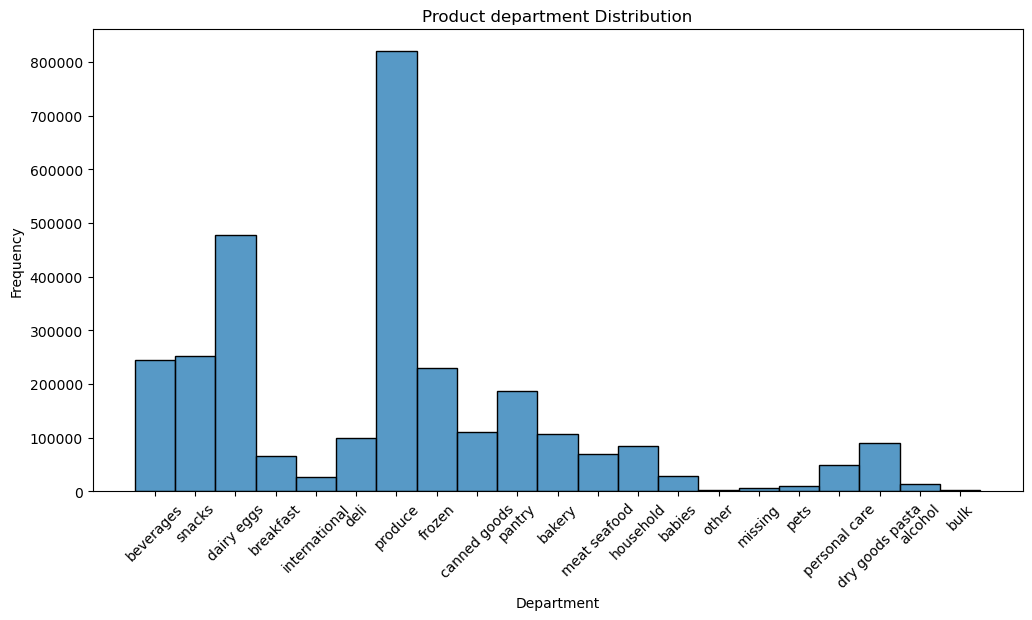

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(out_not_30_df['department'])
plt.title('Product department Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

### 7일 전 산 물품 확인

In [29]:
out_not_7_df = out_not_df[out_not_df['days_since_prior_order'] == 7]

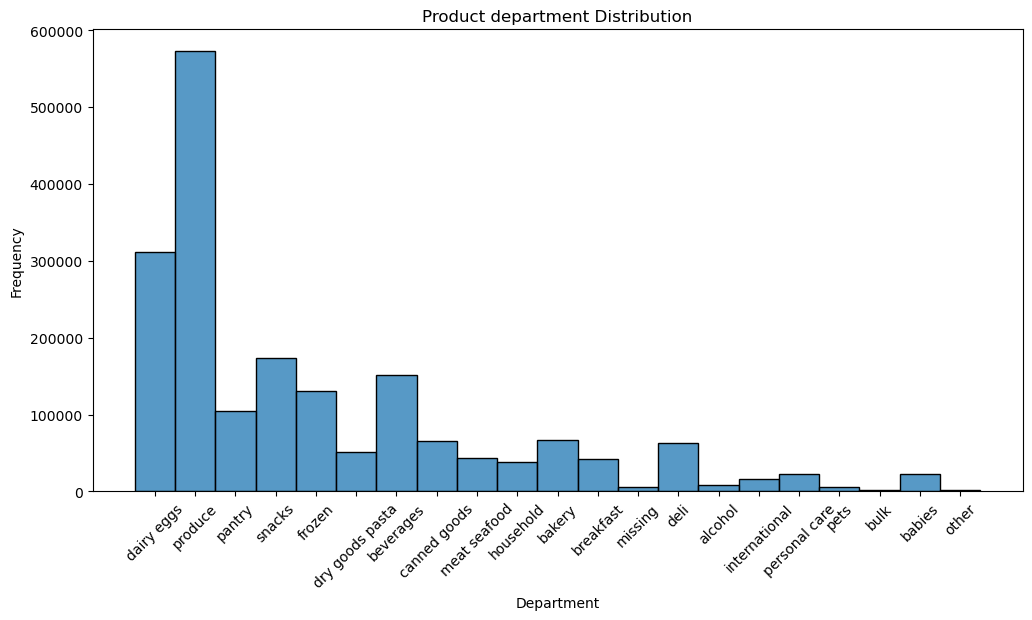

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(out_not_7_df['department'])
plt.title('Product department Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

### 30일 이후 주기에만 산 물품의 항목이 무엇인지 확인

In [ ]:
prior_30_df = df[df['days_since_prior_order'] == 30]

In [ ]:
prior_7_df = df[df['days_since_prior_order'] == 7]

In [ ]:
# 7일전 어떤 물품들 구매했는지
product_list = prior_7_df.groupby('product_name')['order_id'].count().to_frame().sort_values(by='order_id', ascending=False).index.unique().tolist()
# 30일 전 물품 중 어떤 물품 구매했는지 확인
product_prior_30_list = prior_30_df['product_name'].unique().tolist()
#-----------------------------------
product_set = set(product_list)

# 리스트 내포를 사용하여 필터링
result_list = [j for j in product_prior_30_list if j not in product_set]
#-----------------------------------
# 30일에만 산 물품 목록
df_item_30_only = prior_30_df[prior_30_df['product_name'].isin(result_list)]

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_item_30_only['department'])
plt.title('Product department Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
# 7일전 어떤 물품들 구매했는지
# product_list = out_not_7_df.groupby('product_name')['order_id'].count().to_frame().sort_values(by='order_id', ascending=False).index.unique().tolist()

In [99]:
# 30일 전 물품 중 어떤 물품 구매했는지 확인
# product_prior_30_list = out_not_30_df['product_name'].unique().tolist()

In [75]:
# product_set = set(product_list)

# # 리스트 내포를 사용하여 필터링
# result_list = [j for j in product_prior_30_list if j not in product_set]

In [77]:
# # 30일에만 산 물품 목록
# df_item_30_only = out_not_30_df[out_not_30_df['product_name'].isin(result_list)]

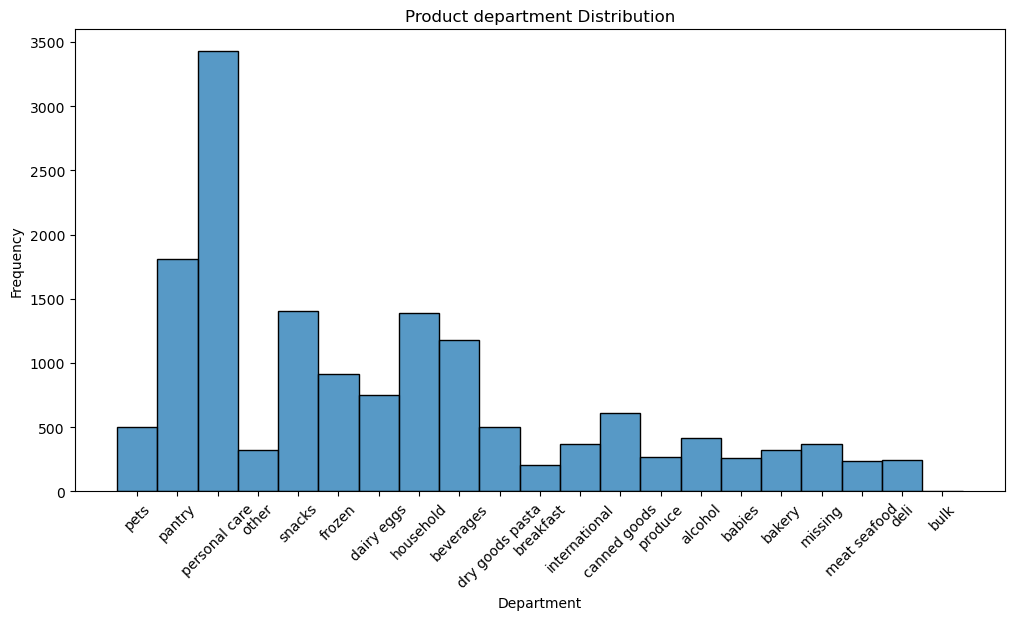

In [117]:
# plt.figure(figsize=(12, 6))
# sns.histplot(df_item_30_only['department'])
# plt.title('Product department Distribution')
# plt.xlabel('Department')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)

# plt.show()

- 그럼 30일이후에는 추가로 무엇을 구매 하였는지 확인을 해보았습니다.
- 방법은 30일 전 구매 물품과 7일 주기로 구매한 물품을 비교하여 30일 이후 주기로 산 물품만 확인
- 제일 많이 산 품목 종류는 personal_care로 확인 되었으며, 30일이후 주기로 산 물품들은 대부분 유통기한이 짧은 식료품이 아닌 생활용품들이 대부분 분포하는 것으로 확인 됨.

### 어떤 제품의 재구매율이 높은지 확인
- 많이 사는 produce 물품과 제품의 재구매율이 서로 비례하는지 확인
- 재구매율=(재구매 수 / 총 구매 수)×100

In [133]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [179]:
repurchase_rate = df.groupby('department')['reordered'].mean() * 100

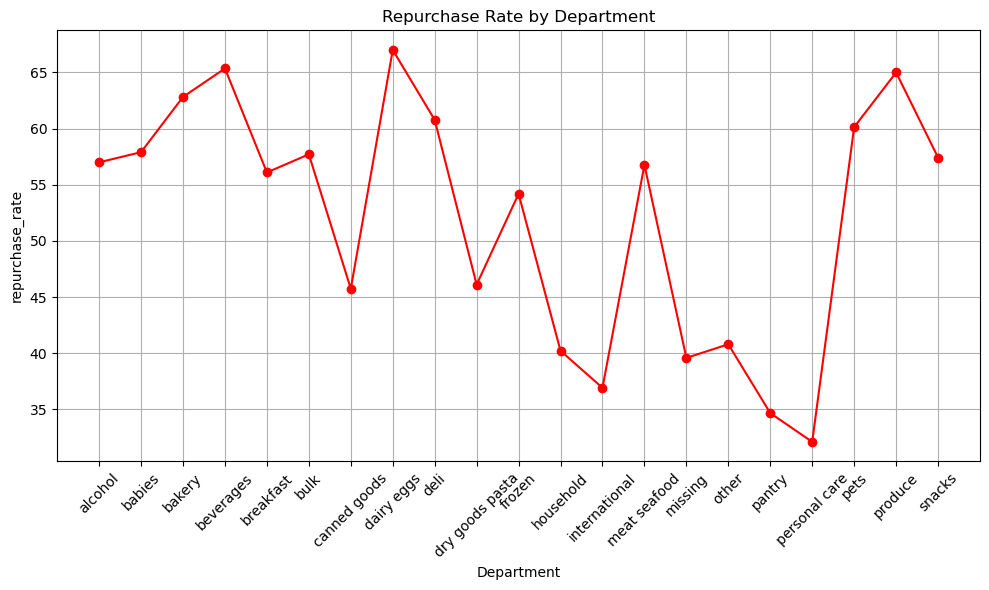

In [205]:
plt.figure(figsize=(10,6))
plt.plot(repurchase_rate.index, repurchase_rate.values, marker='o', linestyle='-', color='r')
plt.title('Repurchase Rate by Department')
plt.xlabel('Department')
plt.ylabel('repurchase_rate')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

- 확실히 produce(식료품)의 재구매 수는 많은 것은 확인 됬습니다.
- 근데 produce보다 daily eggs(계란 및 유제품류)의 수가 좀 더 자주 구매하는 물품으로 확인됬습니다. 확실히 **유통기한이 더 짧은 물품**일수록 재구매 수가 더 큰것 같습니다.
- 그리고 위에서 30일 이후 주기로 사는 물품 중 가장 많은 personal care가 확실히 오래 사용하는 만큼 재구매 수가 적은 것 또한 확인 할 수 있었습니다.

### 장바구니 담는 순서에 따른 재구매율 확인하기